# Mott transition in a Weyl semimetal
A simple model of a Weyl semimetal is defined by the following Hamiltonian:

$$ H = H_0 + U\sum_{i} n_{i\uparrow}n_{i_\downarrow} $$

where

$$ H_0 = \sum_{\mathbf{k}} c_\mathbf{k}^\dagger \mathcal{H}_\mathbf{k} c_\mathbf{k} \qquad\qquad
c_\mathbf{k}=(c_{\mathbf{k}\uparrow}, c_{\mathbf{k}\downarrow}) $$

with the $k$-dependent matrix 

$$ \mathcal{H}_\mathbf{k} =  \left\{ 2t(\cos k_x - \cos k_0) + m(2-\cos k_y -\cos k_z)\right\}\sigma_x
+ 2t\sin k_y \sigma_y + 2t\sin k_z \sigma_z $$

where $\sigma_{x,y,z}$ are the Pauli matrices.
We will set $m=\frac32$ and $k_0=3\pi/8$.
See Witczak-Krempa *et al.*, Phys. Rev. Lett. **113**, 136402 (2014).

1. Construct this model, with the operators $t$, $m$ and $U$.
2. Plot the Fermi surface at $U=0$ using `spectral.mdc()` and identify the Weyl nodes along the $k_x$ axis.
3. Using CPT, show how the position of the Weyl node changes for $U=6$ compared with $U=0$.

In [1]:
# importing necessary modules
from pyqcm import *
from pyqcm.spectral import *

import numpy as np

# Changing size of matplotlib elements
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 75

Number of openMP threads = 4


In [2]:
# Constructing a cubic cluster in a cubic lattice
new_cluster_model("clus", 8, 0)
add_cluster("clus", [0,0,0], [
    [0,0,0],
    [1,0,0],
    [0,1,0],
    [1,1,0],
    [0,0,1],
    [1,0,1],
    [0,1,1],
    [1,1,1]
])
lattice_model("cubic_lattice", [[2,0,0], [0,2,0], [0,0,2]])

In [3]:
# On-site interaction operator 
interaction_operator("U")

# Assembling the parts of operator `t`
hopping_operator("t", [1,0,0], 1, tau=1, sigma=1)
hopping_operator("t", [0,0,0], -np.cos(3*np.pi/8), tau=0, sigma=1)
hopping_operator("t", [0,1,0], 1, tau=2, sigma=2)
hopping_operator("t", [0,0,1], 1, tau=2, sigma=3)

# Assembling the parts of operator `m`
hopping_operator("m", [0,0,0], 1, tau=0, sigma=1)
hopping_operator("m", [0,1,0], -0.5, tau=1, sigma=1)
hopping_operator("m", [0,0,1], -0.5, tau=1, sigma=1)

In [4]:
# Defining a model at half-filling 
set_target_sectors(["R0:N8"])
set_parameters("""
    U = 4
    mu = 2
    t=1
    m=1.5
""")
I = new_model_instance()

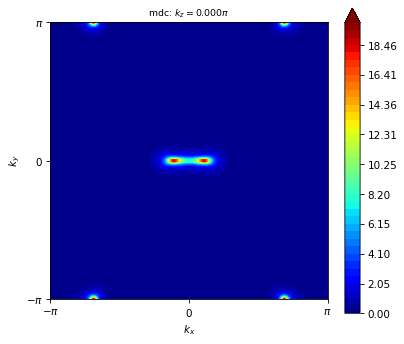

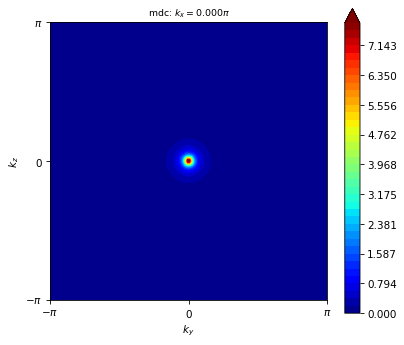

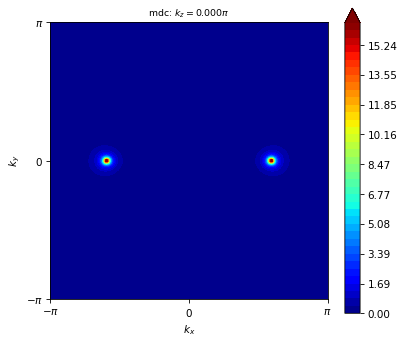

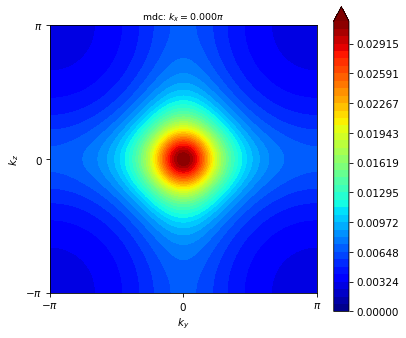

In [5]:
set_parameter("U", 1e-6)
set_parameter("mu", 1e-6)
new_model_instance()
mdc(plane="xy")
mdc(plane="yz")

set_parameter("U", 6)
set_parameter("mu", 3)
new_model_instance()
mdc(plane="xy")
mdc(plane="yz")


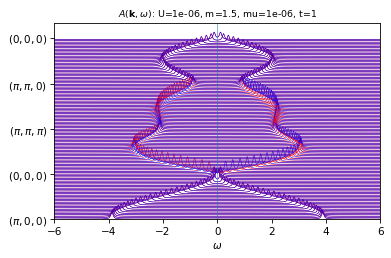

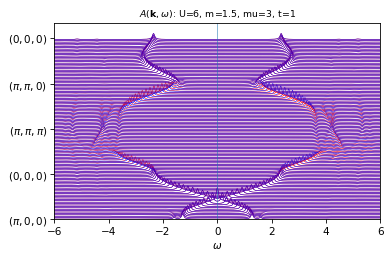

In [15]:
set_parameter("U", 1e-6)
set_parameter("mu", 1e-6)
new_model_instance()
spectral_function(path="cubic")

set_parameter("U", 6)
set_parameter("mu", 3)
new_model_instance()
spectral_function(path="cubic")

## Example uses of the Berry phase functions
An array of functions are available in the submodule `pyqcm.berry` to display the topological properties of the model.

#### Berry_curvature()
`Berry_curvature(...)` draws a 2D density plot of the Berry curvature $\mathcal{B}(k_1,k_2)$ as a function of wavevector, by default on a square grid going from $-\pi$ to $\pi$ in each direction. It is possible to modify the range, the orientation of the plane ($k_xk_y$, $k_xk_z$ or $k_yk_z$), the value of $k_3$ (the level of the plane), the periodization scheme, etc. (see documentation). The Berry curvature is computed by adding the zero-frequency self-energy (real part) to the Hamiltonian and treated the result as a one-body Hamiltonian, as explained in  Z. Wang and S.C. Zhang, Physical Review X **2**, 031008 (2012).
The numerical computation itself is inspired by Takahiro Fukui, Yasuhiro Hatsugai, and Hiroshi Suzuki, Journal of the Physical Society of Japan **74**, 1674 (2005), with an important caveat: the possibility of grid refining (optional boolean parameter `rec`) if the if connexion is too large, which could be the sign of missed *twists* between grid points.

global parameter eta set to 0
global parameter periodization set to G


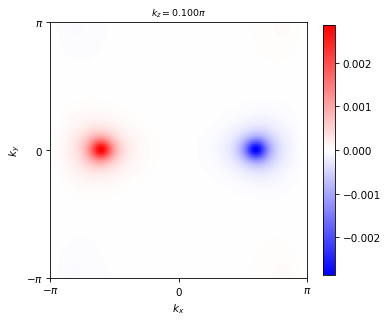

In [16]:
from pyqcm.berry import *
Berry_curvature(nk=100, eta=0.0, period='G', range=None, label=0, band=0, subdivide=False, plane='xy', k_perp=0.1, file=None, plt_ax=None)

#### Berry_flux()
`Berry_flux(k0, R, nk=40, plane='xy', label=0, band=0)` computes the flux of the Berry curvature through a polygonal circle of `nk` sides and radius `R` centered at wavevector `k0` in the plane `plane`. The computation is made by integrating the Berry connexion along the circle. This function only returns a value, it does not create a plot. However, `Berry_flux_map()` does just that. This is in fact a different way of computing the Berry curvature, in principle more time consuming than `Berry_curvature(...)`, but independent of the computational method described in Fukui et al.

In [8]:
for kx in np.arange(0,1,0.1):
    print('kx/pi = {:.2f} : Berry flux = {:.2f}'.format(kx, 1e-7+Berry_flux([kx,0,0], 0.05, nk=10, plane='xy')))

kx/pi = 0.00 : Berry flux = 0.00
kx/pi = 0.10 : Berry flux = 0.00
kx/pi = 0.20 : Berry flux = 0.00
kx/pi = 0.30 : Berry flux = 0.00
kx/pi = 0.40 : Berry flux = 0.00
kx/pi = 0.50 : Berry flux = 0.00
kx/pi = 0.60 : Berry flux = -0.50
kx/pi = 0.70 : Berry flux = 0.00
kx/pi = 0.80 : Berry flux = 0.00
kx/pi = 0.90 : Berry flux = 0.00


/home/t-o/miniconda3/lib/python3.9/site-packages/pyqcm/__init__.py:1040: UserWarning: ***WARNING*** : `0` carries a specific meaning for QCM (does not create operator). If a trivial operator value is desired, using a small value such as `1e-9` is preferable.
  warn(


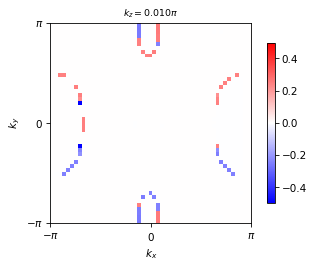

In [9]:
from pyqcm.berry import *

set_parameter("U", 0)
new_model_instance()
Berry_flux_map(nk=50, plane='z', dir='z', k_perp=0.01, label=0, band=0, npoints=8, radius=None, file=None, plt_ax=None)

#### Berry_field_map()
`Berry_field_map()` Does the same thing as `Berry_flux_map()`, except that it computes all components of the Berry curvature (for a 3D model, like a Weyl semi-metal) and plots the transverse components as field lines, and the third component as a color map. Again we have a choice of the plane, etc.

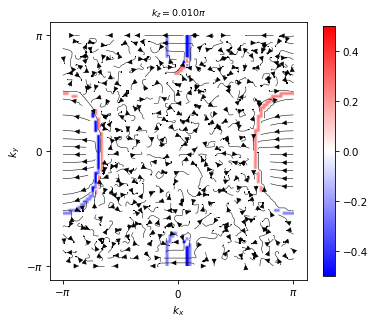

(<matplotlib.image.AxesImage at 0x7ffab3cc72b0>,
 <matplotlib.streamplot.StreamplotSet at 0x7ffaa381d7c0>)

In [10]:
Berry_field_map(nk=80, nsides=4, plane='z', k_perp=0.01, label=0, band=0, file=None, plt_ax=None)

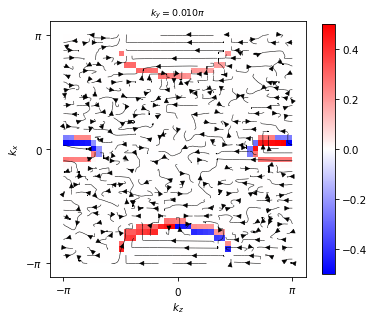

(<matplotlib.image.AxesImage at 0x7ffaa352e610>,
 <matplotlib.streamplot.StreamplotSet at 0x7ffaa262fbe0>)

In [11]:
Berry_field_map(nk=40, nsides=4, plane='y', k_perp=0.01, label=0, band=0, file=None, plt_ax=None)

#### monopole()
`monopole(k, a=0.01, nk=20, label=0, band=0, subdivide=False)`computes the flux of the Berry curvature through a closed cube of side `a` centered at wavevector `k` with `nk` wavevectors on the side of the cube. Again, the boolean option `subdivide` will subdivide the grid on each face of the cube to maintain a small gradient of the phase. To get a map of this function to the whole Brillouin zone, the function `monopole_map()` can be called.

In [12]:
for kx in np.arange(0,1,0.1):
    print('kx/pi = {:.2f} : monopole = {:.4f}'.format(kx, 1e-7+monopole([kx,0,0], a=0.04, nk=30, subdivide=True)))

kx/pi = 0.00 : monopole = 0.0000
kx/pi = 0.10 : monopole = 0.0000
kx/pi = 0.20 : monopole = 0.0000
kx/pi = 0.30 : monopole = 0.0000
kx/pi = 0.40 : monopole = 0.0000
kx/pi = 0.50 : monopole = 0.0000
kx/pi = 0.60 : monopole = 0.0000
kx/pi = 0.70 : monopole = -0.0022
kx/pi = 0.80 : monopole = 0.0000
kx/pi = 0.90 : monopole = 0.0000


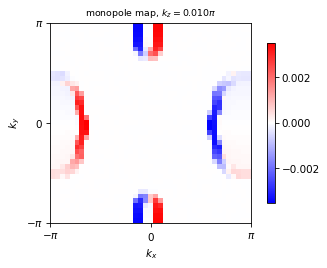

In [13]:
monopole_map(k_perp=0.01)